17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.5008 - loss: 0.6935 - val_accuracy: 0.5062 - val_loss: 0.6923
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.5050 - loss: 0.6895 - val_accuracy: 0.5154 - val_loss: 0.6903
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.5193 - loss: 0.6770 - val_accuracy: 0.5188 - val_loss: 0.6970
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.5403 - loss: 0.6685 - val_accuracy: 0.5196 - val_loss: 0.6977
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5398 - loss: 0.6461 - val_accuracy: 0.5102 - val_loss: 0.7182
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.5450 - loss: 0.6424 - val_accuracy: 0.5170 - val_loss: 0.7172
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.5470 - loss: 0.6393 - val_accuracy: 0.5200 - val_loss: 0.7182
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.5468 - loss: 0.6352 - val_accu

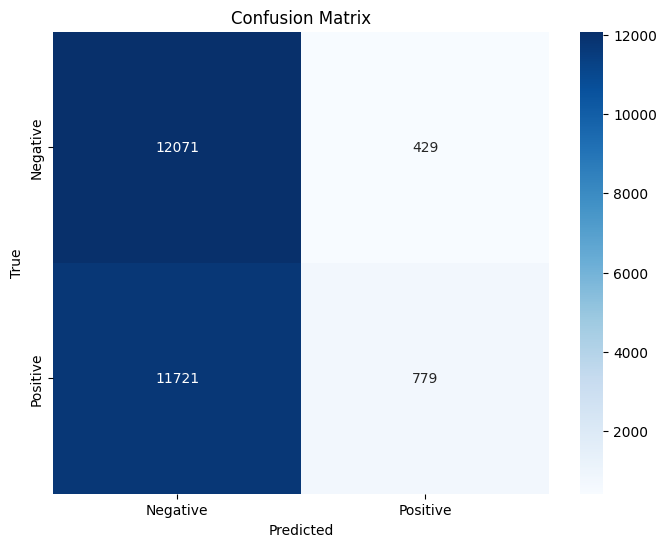


Classification Report:
              precision    recall  f1-score   support

    Negative       0.51      0.97      0.67     12500
    Positive       0.64      0.06      0.11     12500

    accuracy                           0.51     25000
   macro avg       0.58      0.51      0.39     25000
weighted avg       0.58      0.51      0.39     25000



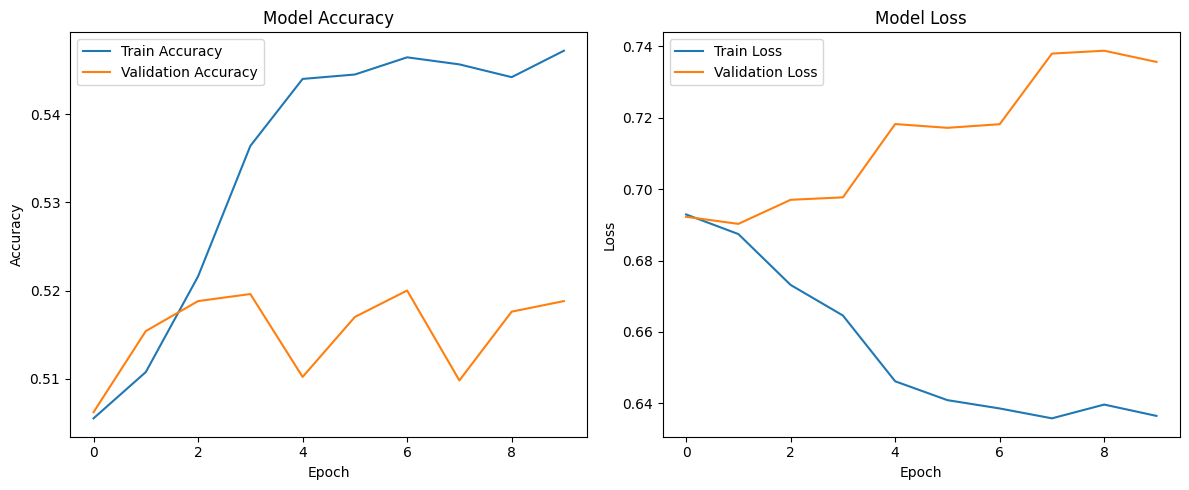

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess the IMDB dataset
vocab_size = 10000  # Keep top 10,000 most frequent words
max_len = 500       # Maximum review length (words)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

# 2. Build the LSTM model
embedding_dim = 128

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

# 4. Evaluate the model
def evaluate_model(model, x_test, y_test):
    # Get predictions (probabilities)
    y_pred_prob = model.predict(x_test)
    # Convert to binary predictions (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    return y_pred

y_pred = evaluate_model(model, x_test, y_test)

# 5. Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)